# PTB-XL

This notebook unpacks the contents of the PTB-XL database, showing the splits between the different diagnostic types, and other class distributions.

In [8]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import ast
from pathlib import Path

plt.rcParams.update({ "font.family": "serif", "font.serif": ["CMU Bright"], "mathtext.fontset": "cm"}) # for math symbols })

{'STTC': 4186, 'NORM': 7596, 'HYP': 2119, 'CD': 3907, 'MI': 4379}
{'STTC': 528, 'NORM': 955, 'HYP': 268, 'CD': 495, 'MI': 540}
{'STTC': 521, 'NORM': 963, 'HYP': 262, 'CD': 496, 'MI': 550}


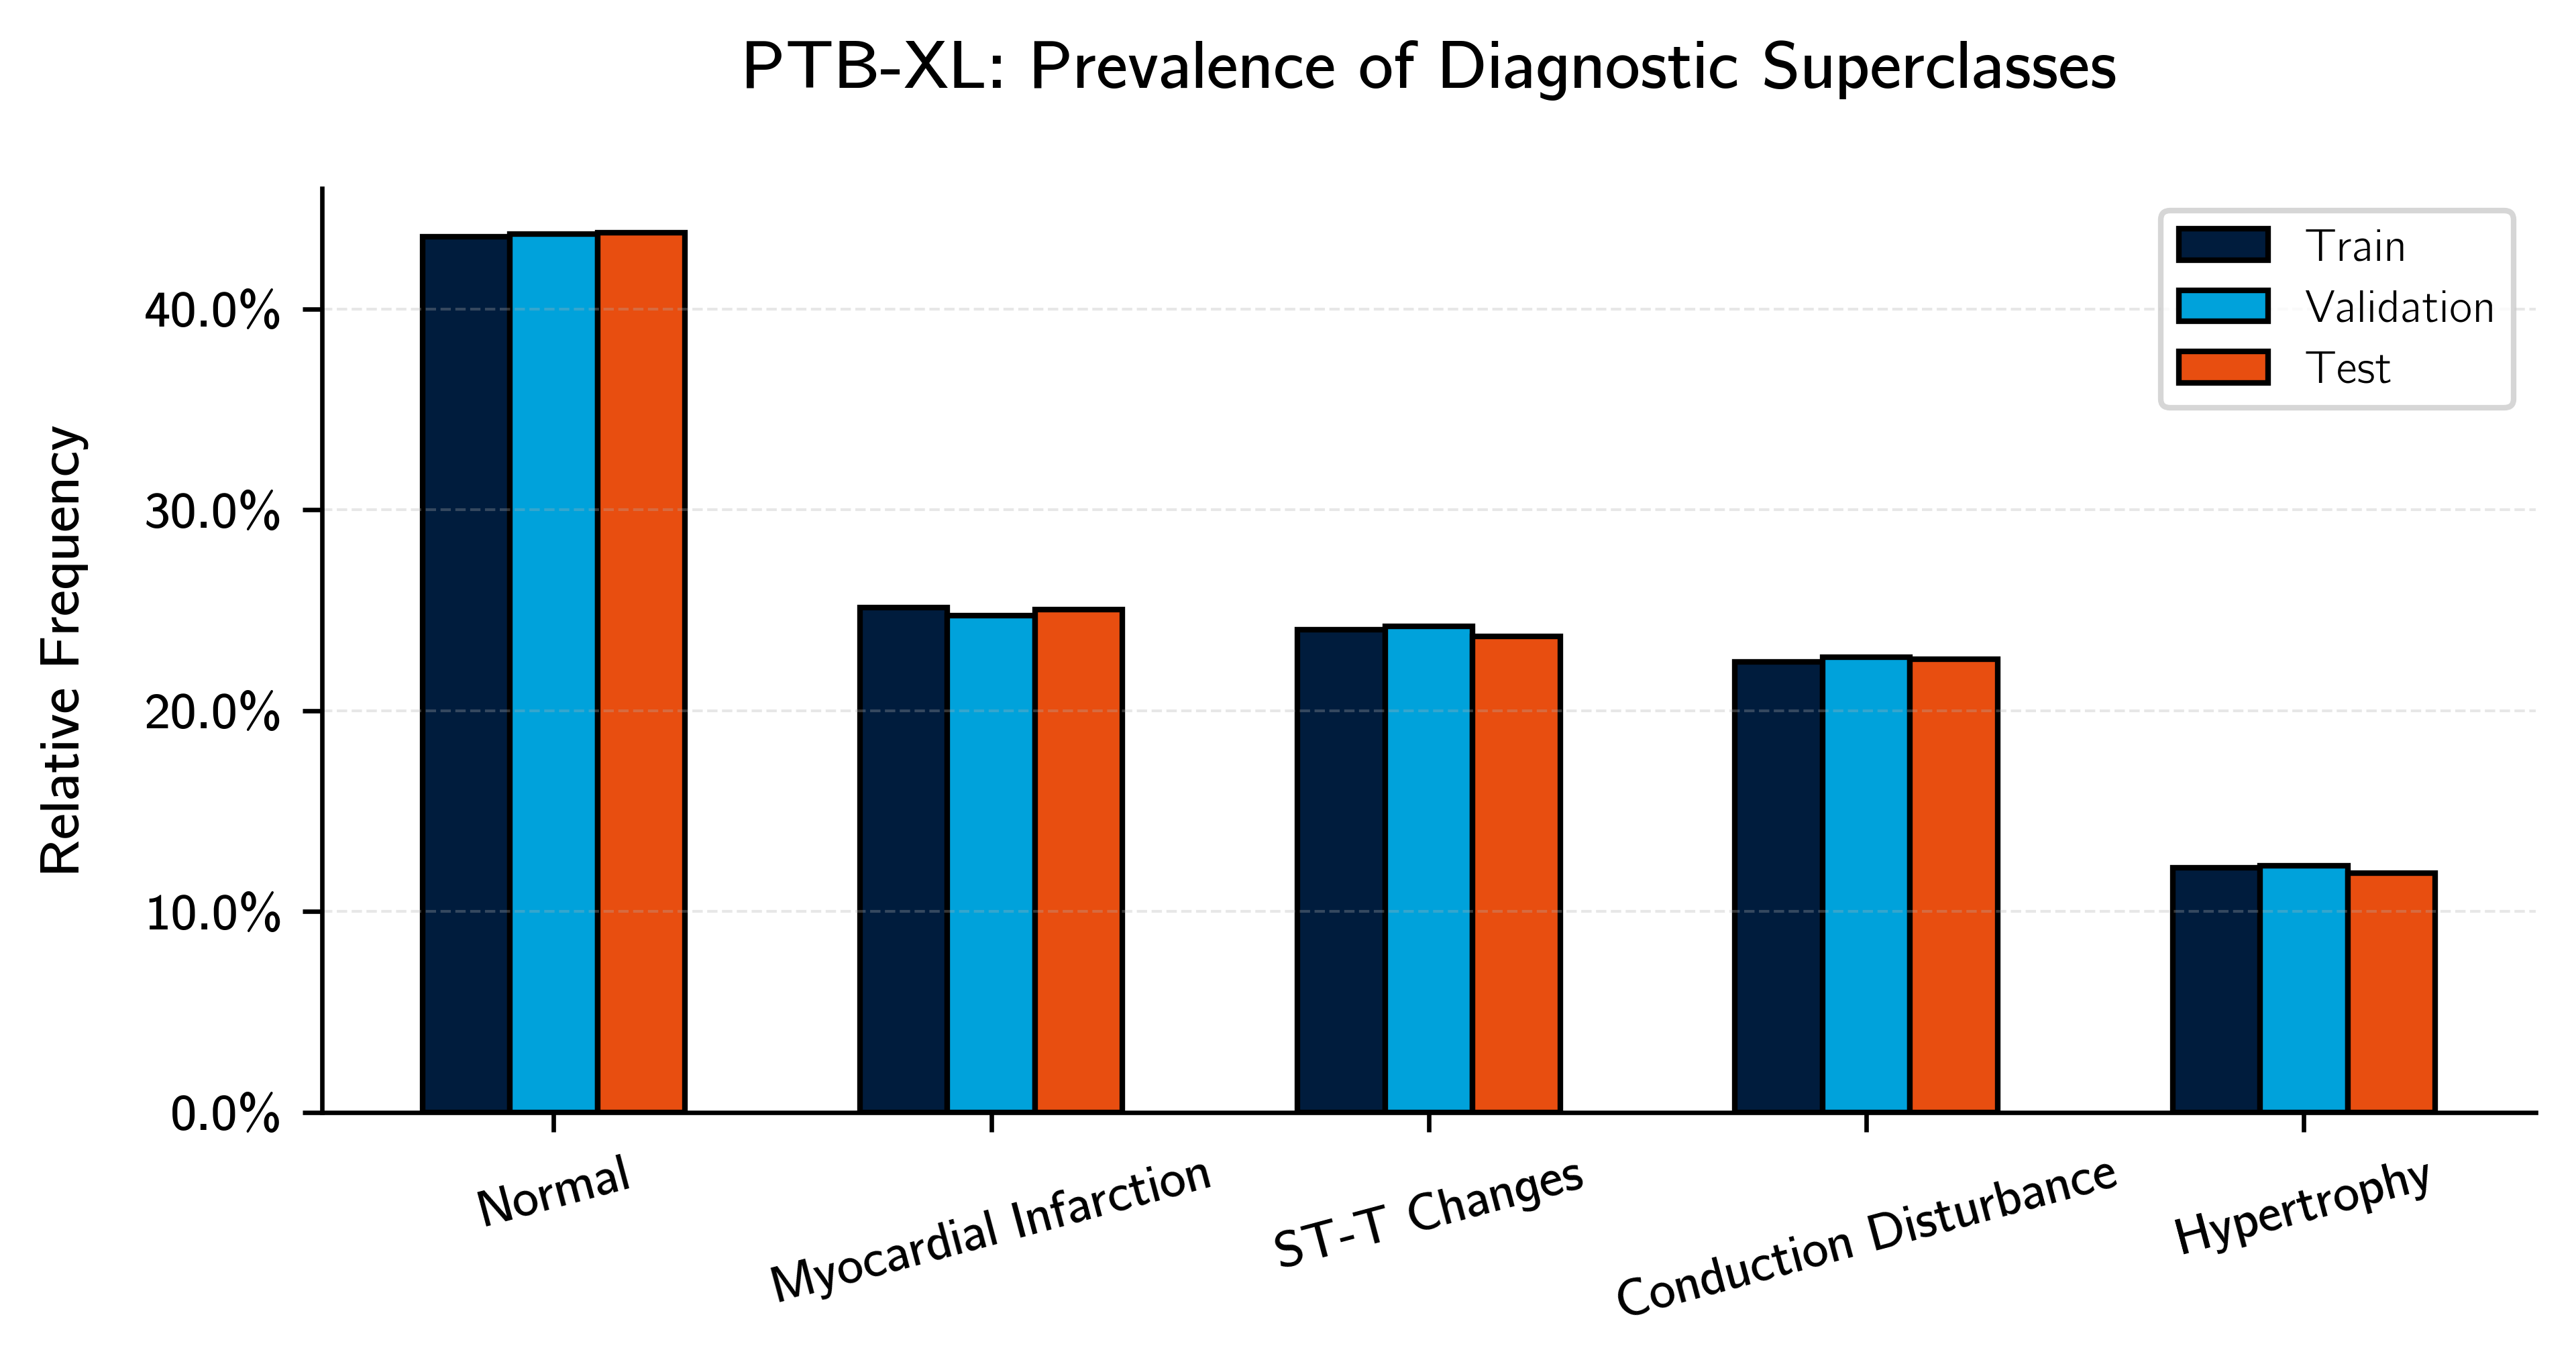

'figures/diagnostic_superclass_distribution'

In [27]:
# Load the validation set metadata
train_meta = '../../data/processed/ptbxl100all/all/meta_train.csv'
val_meta = '../../data/processed/ptbxl100all/all/meta_val.csv'
test_meta = '../../data/processed/ptbxl100all/all/meta_test.csv'

train_meta = pd.read_csv(train_meta)
val_meta = pd.read_csv(val_meta)
test_meta = pd.read_csv(test_meta)

train_meta['scp_codes'] = train_meta['scp_codes'].apply(lambda x: ast.literal_eval(x))
val_meta['scp_codes'] = val_meta['scp_codes'].apply(lambda x: ast.literal_eval(x))
test_meta['scp_codes'] = test_meta['scp_codes'].apply(lambda x: ast.literal_eval(x))

THRESHOLD = 0.5
def codes_above_threshold(code_dict, thr=THRESHOLD):
    return {code for code, prob in code_dict.items() if prob >= thr}

train_meta['present_codes'] = train_meta['scp_codes'].apply(lambda x: codes_above_threshold(x, THRESHOLD))
val_meta['present_codes'] = val_meta['scp_codes'].apply(lambda x: codes_above_threshold(x, THRESHOLD))
test_meta['present_codes'] = test_meta['scp_codes'].apply(lambda x: codes_above_threshold(x, THRESHOLD))

# Plot the distribution of diagnostic superclasses in all datasets
def get_superclass_counts(meta):
    diagnostic_superclasses = {
        'NORM', 'MI', 'STTC', 'HYP', 'CD'
    }

    counts = {cls: 0 for cls in diagnostic_superclasses}
    for index, row in meta.iterrows():
        for code in diagnostic_superclasses:
            if code in row['diagnostic_superclass']:
                counts[code] += 1

    print(counts)


    # Create a DataFrame for plotting
    superclass_counts = pd.Series(counts)
    superclass_counts = superclass_counts[superclass_counts > 0]
    superclass_counts = superclass_counts.sort_values(ascending=False)

    return superclass_counts


# Plot the distribution of diagnostic superclasses in the training set
train_superclass_counts = get_superclass_counts(train_meta)
val_superclass_counts = get_superclass_counts(val_meta)
test_superclass_counts = get_superclass_counts(test_meta)

# Maastricht colours
dark_blue = '#001C3D'
light_blue = '#00A2DB'
orange_red = '#E84E10'
orange = '#F39425'

# Normalize the counts
train_superclass_counts = train_superclass_counts / len(train_meta)
val_superclass_counts = val_superclass_counts / len(val_meta)
test_superclass_counts = test_superclass_counts / len(test_meta)

# Plotting
fig, ax = plt.subplots(figsize=(6.5, 3.5), dpi=600)

# Bar specs
w, x = 0.2, np.arange(len(train_superclass_counts))

# Bars
ax.bar(x - w, train_superclass_counts.values, label='Train', alpha=1, width=w, color=dark_blue, edgecolor='black')
ax.bar(x, val_superclass_counts.values, label='Validation', alpha=1, width=w, color=light_blue, edgecolor='black')
ax.bar(x + w, test_superclass_counts.values, label='Test', alpha=1, width=w, color=orange_red, edgecolor='black')

# X-axis
code_to_label = {
    'NORM': 'Normal',
    'MI': 'Myocardial Infarction',
    'STTC': 'ST-T Changes',
    'HYP': 'Hypertrophy',
    'CD': 'Conduction Disturbance'
}
ax.set_xticks(x)
ax.set_xticklabels([code_to_label[code] for code in train_superclass_counts.index], rotation=15, ha='center', fontsize=9, fontweight='semibold')

# Y-axis
ax.set_ylabel('Relative Frequency', fontsize=10, fontweight='semibold', labelpad=10)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
for label in ax.get_yticklabels():
    label.set_fontweight('semibold')
    label.set_fontsize(9)

# Annotate bars with % values
#for container in ax.containers:
    #ax.bar_label(container, labels=[f'{v*100:0.1f}%' for v in container.datavalues], padding=3, fontsize=8)

# Title and legend
ax.set_title('PTB-XL: Prevalence of Diagnostic Superclasses', pad=18, fontsize=12, weight='bold')
ax.legend(frameon=True, fontsize=8, loc="upper right")

# Aesthetics
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.3)

fig.tight_layout()

# Save publication ready figure
file_path = 'figures/diagnostic_superclass_distribution'
fig.savefig(file_path + '.pdf', format='pdf', bbox_inches='tight')
fig.savefig(file_path + '.png', format='png', dpi=600, bbox_inches='tight')

plt.show()

file_path

Horizontal bars

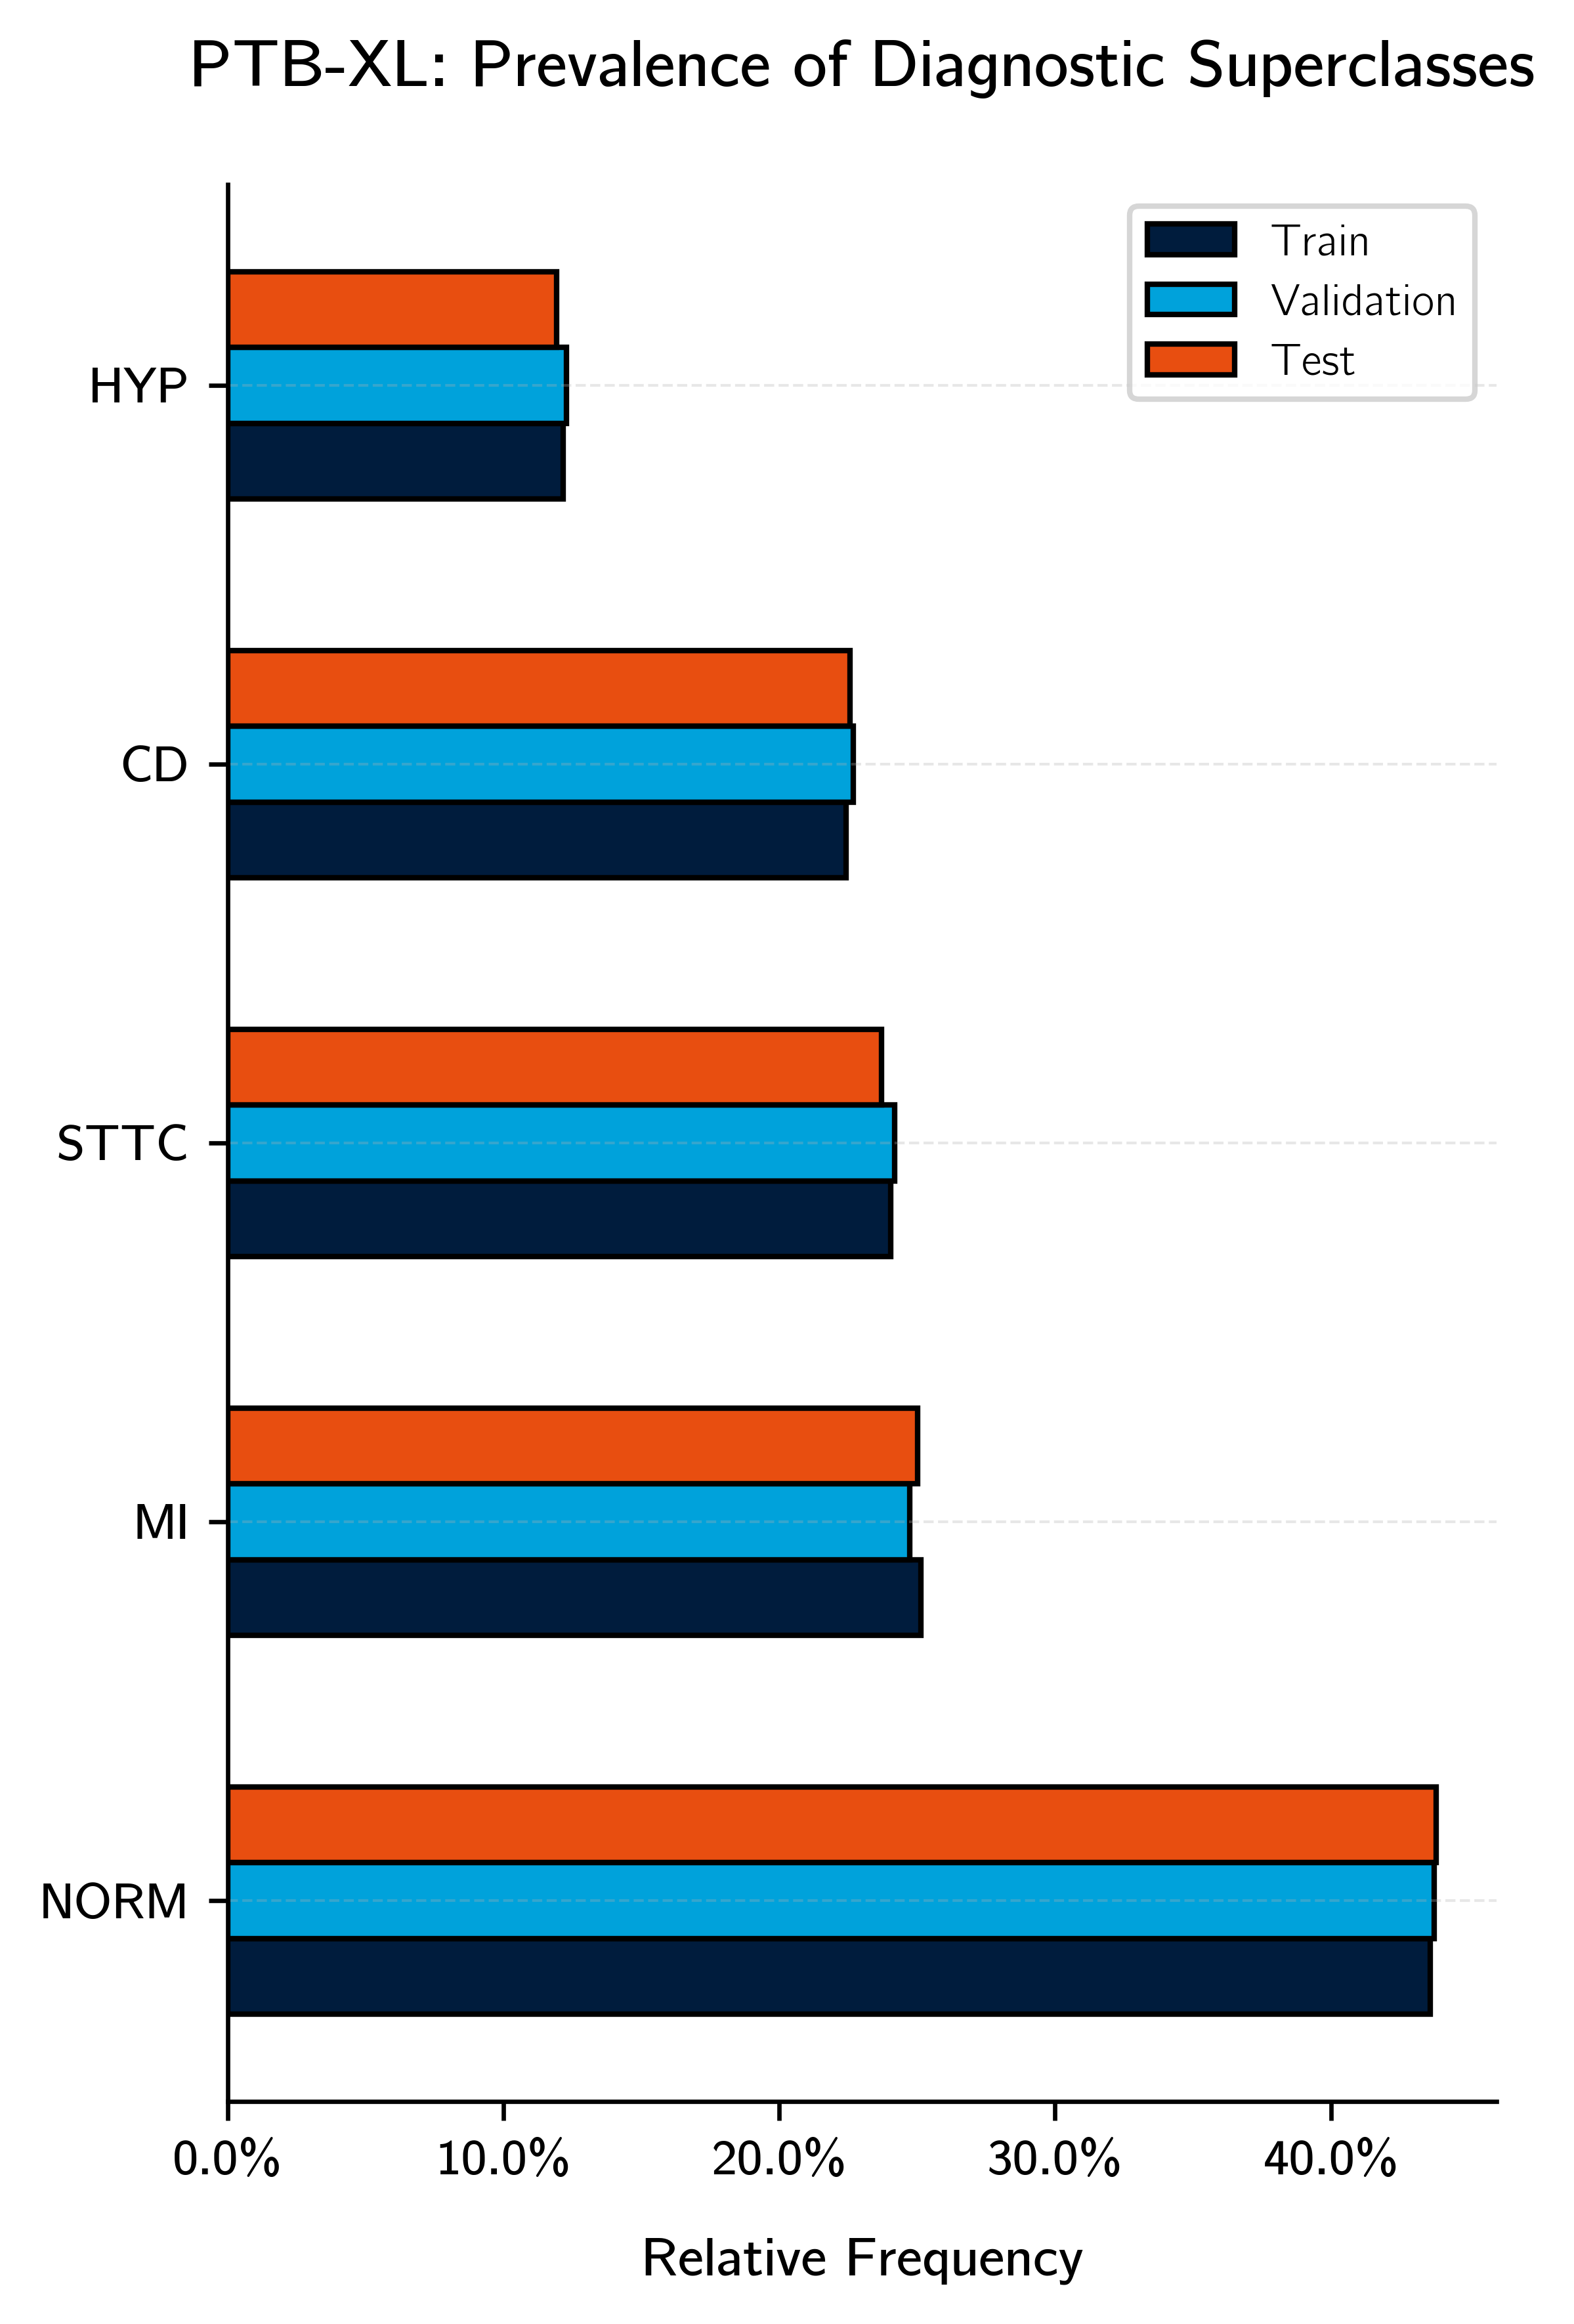

'figures/diagnostic_superclass_distribution_vertical'

In [26]:
# Plotting
fig, ax = plt.subplots(figsize=(4, 6), dpi=600)

# Bar specs
h, y = 0.2, np.arange(len(train_superclass_counts))

# Bars
ax.barh(y - w, train_superclass_counts.values, label='Train', alpha=1, height=h, color=dark_blue, edgecolor='black')
ax.barh(y, val_superclass_counts.values, label='Validation', alpha=1, height=h, color=light_blue, edgecolor='black')
ax.barh(y + w, test_superclass_counts.values, label='Test', alpha=1, height=h, color=orange_red, edgecolor='black')

# X-axis
code_to_label = {
    'NORM': 'Normal',
    'MI': 'Myocardial Infarction',
    'STTC': 'ST-T Changes',
    'HYP': 'Hypertrophy',
    'CD': 'Conduction Disturbance'
}
ax.set_yticks(y)
ax.set_yticklabels([code for code in train_superclass_counts.index], rotation=0, ha='right', fontsize=9, fontweight='semibold')

# Y-axis
ax.set_xlabel('Relative Frequency', fontsize=10, fontweight='semibold', labelpad=10)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
for label in ax.get_xticklabels():
    label.set_fontweight('semibold')
    label.set_fontsize(9)

# Annotate bars with % values
#for container in ax.containers:
    #ax.bar_label(container, labels=[f'{v*100:0.1f}%' for v in container.datavalues], padding=3, fontsize=8)

# Title and legend
ax.set_title('PTB-XL: Prevalence of Diagnostic Superclasses', pad=18, fontsize=12, weight='bold')
ax.legend(frameon=True, fontsize=8, loc="upper right")

# Aesthetics
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.3)

fig.tight_layout()

# Save publication ready figure
file_path = 'figures/diagnostic_superclass_distribution_vertical'
fig.savefig(file_path + '.pdf', format='pdf', bbox_inches='tight')
fig.savefig(file_path + '.png', format='png', dpi=600, bbox_inches='tight')

plt.show()

file_path